<a href="https://colab.research.google.com/github/dinaraZh/sentimentAnalysis/blob/main/Kinopoisk_sentimentAnalysis_ml_dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задача: Нужно классифицировать отзывы по заданным категориям - положительные (good), нейтральные (neutral) и негативные (bad).
Данную задачу классификации я решила с 2 способами: преобразование TF-idf + классический классификатор машинного обучения, нейронные сети(LSTM) с векторным представлением слов.


**1. Импортирование нужных библиотек**

In [ ]:
import pandas as pd
import numpy as np
import random
import itertools
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
 

**2.Загрузка и просмотр данных**

In [ ]:
df=pd.read_excel("/content/reviews.xlsx", converters={"review_text":str,"review_subtitle":str},header=0,na_filter=False)
df.head()
#must be str, not int

,target,movie_link,author_id,author_name,review_subtitle,review_text
0,good,/film/178563/,/user/311869/,sochi2014,,Настоящее кино. Наше кино. Прекрасная работа с...
1,good,/film/178563/,/user/1591566/,Альберт Попов,Предтеча многого,"Мало того, что сериал «Империя под ударом» (12..."
2,good,/film/178563/,/user/331395/,LennoxL,Срез жизни общества начала 20 го века,Период от реформ Александра Освободителя до пе...
3,good,/film/178563/,/user/4379604/,Ana_K,"Пусть мир погибнет, но восторжествует правосудие",Атмосферный сериал о Российской Империи начала...
4,neutral,/film/178563/,/user/178788/,Skept,Террор  Зло с непредсказуемыми последствиями,Самая большая беда современного общества это т...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80284 entries, 0 to 80283
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   target           80284 non-null  object
 1   movie_link       80284 non-null  object
 2   author_id        80284 non-null  object
 3   author_name      80284 non-null  object
 4   review_subtitle  80284 non-null  object
 5   review_text      80284 non-null  object
dtypes: object(6)
memory usage: 3.7+ MB


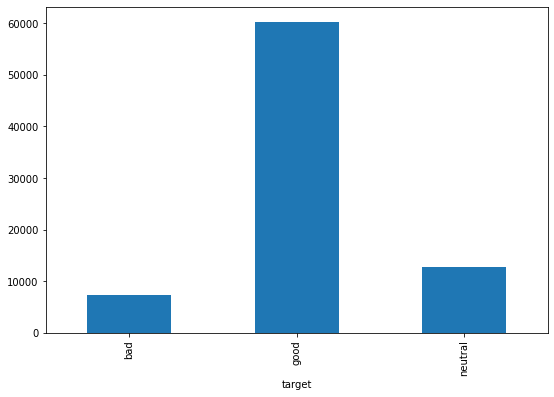

In [ ]:
gr=plt.figure(figsize=(9,6))
df.groupby('target').target.count().plot.bar(ylim=0)
plt.show()

**3.Разделение датасета на training and testing**

In [ ]:
df["whole_review"]=df["review_subtitle"] + " " +df["review_text"] #объединяем текс и подзаголовок как один целый отзыв

df['target'] = df['target'].factorize()[0] # заменяем метку в цифру {good:0, neutral:1, bad:2 }
X=df["whole_review"]
y=df["target"]# модель будет строиться по определению target

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=1, shuffle=True)
print("Training set: ", len(X_train))
print("Testing set: ", len(X_test))

Training set:  64227
Testing set:  16057


**4.Обучение TF-IDF+LogisticRegression**

In [ ]:
MAX_DF = 0.8 
MIN_DF = 5
class_weight={0:1,1:6,2:8.5}

pipeline = Pipeline((('vec', TfidfVectorizer(max_df=MAX_DF,min_df=MIN_DF,norm='l2',ngram_range=(1, 2))),
                             ('cls', LogisticRegression(solver='lbfgs',max_iter=10000,class_weight=class_weight) )))


In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vec',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.8, max_features=None,
                                 min_df=5, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('cls',
                 LogisticRegression(C=1.0, class_weight={0: 1, 1: 6, 2: 8.5},
                                    dual=False, fit_intercept=True,
   

**5.Оценка качества модели TF-IDF+Logistic Regession/LinearSVC**

In [ ]:
y_train_pred = pipeline.predict(X_train)
print("Logistic Regression train score - " + str(pipeline.score(X_train, y_train)))
print()
print(metrics.classification_report(y_train, y_train_pred, digits=3))

Logistic Regression train score - 0.9755554517570492

              precision    recall  f1-score   support

           0      1.000     0.967     0.983     48140
           1      0.884     1.000     0.939     10235
           2      0.962     1.000     0.981      5852

    accuracy                          0.976     64227
   macro avg      0.949     0.989     0.968     64227
weighted avg      0.978     0.976     0.976     64227



In [ ]:
y_test_pred = pipeline.predict(X_test)
print("Logistic Regression test score - " + str(pipeline.score(X_test, y_test)))
print()
print(metrics.classification_report(y_test, y_test_pred, digits=3))

Logistic Regression test score - 0.848228187083515

              precision    recall  f1-score   support

           0      0.938     0.897     0.917     12049
           1      0.555     0.667     0.606      2579
           2      0.759     0.765     0.762      1429

    accuracy                          0.848     16057
   macro avg      0.751     0.776     0.762     16057
weighted avg      0.861     0.848     0.853     16057



**4.LSTM**

In [ ]:
#Кодирование--Label to Vector
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)

Y = np_utils.to_categorical(encoded_y)

NameError: ignored

In [ ]:
#токенизация
tk = Tokenizer(lower = True)

In [ ]:
tk.fit_on_texts(X)

In [ ]:
out = dict(itertools.islice(tk.word_counts.items(), 10))
print("Словарь :"+str(out))

Словарь :{'настоящее': 1754, 'кино': 35388, 'наше': 1225, 'прекрасная': 1741, 'работа': 8359, 'сценариста': 793, 'режиссёра': 2484, 'операторов': 184, 'профессиональный': 212, 'монтаж': 907}


In [ ]:
#Преобразование в числовое представление
X_seq = tk.texts_to_sequences(X)

In [ ]:
#Огрничение длины 
MAX_LEN_SENTENCES=100
X_pad = pad_sequences(X_seq, maxlen=MAX_LEN_SENTENCES, padding='post')

In [ ]:
index = 1
print(X[index])
print(X_pad[index])

Предтеча многого Мало того, что сериал «Империя под ударом» (12 серий по 45-50 мин., по «делу» на серию») сам по себе, на удивление, хорош и серьёзен, особенно памятуя то непростое время смены столетий и власти в России (ушёл Ельцин, пришёл Путин, уходили бандитские 90-е, восстанавливался, как мог, законопорядок), так он ещё и, вскоре став культовым, послужил предтечей многих последующих телесериальных работ. Но главное- он, наряду с некоторыми другими лентами, дал нам понять, что в современной России, при желании, терпении, старании и соответственном финансовом вливании, можно и нужно создавать не многосерийную мишуру, а вполне настоящее, только «длинное» Кино для телезрителей. Которое хочется пересматривать ещё и ещё и которое даёт пищу и для эмоций, и для души, и для ума. Особое же спасибо нашей «Империи» за привлечение зрительского внимания к российской истории 19-20-го веков (и к самой тамошней жизни, почему мы уже более 15 лет с удовольствием смотрим и детективы, и мелодрамы «и

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_pad, Y, test_size = 0.2, random_state = 1)

In [ ]:
batch_size = 1024
x_train1 = x_train[batch_size:]
y_train1 = y_train[batch_size:]
x_valid = x_train[:batch_size]
y_valid = y_train[:batch_size]

In [ ]:
#построим модель
vocabulary_size = len(tk.word_counts.keys())+1
max_words = MAX_LEN_SENTENCES

embedding_size = 32
model = Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(Dropout(0.3))
model.add(LSTM(200))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 32)           42595616  
_________________________________________________________________
dropout (Dropout)            (None, 100, 32)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 200)               186400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 3)                 603       
Total params: 42,782,619
Trainable params: 42,782,619
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
model_save_path = 'di.h5'
checkpoint_callback = ModelCheckpoint(model_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [ ]:
class_weight={0:1,1:4.5,2:8.5}
history = model.fit(x_train1,
                        y_train1,
                        validation_data=(x_valid,y_valid),
                        batch_size=batch_size,
                        epochs=3,
                        class_weight=class_weight,
                        callbacks=[checkpoint_callback],
                        )

Epoch 1/3
62/62 [==============================] - ETA: 0s - loss: 2.3185 - accuracy: 0.4832
Epoch 00001: val_accuracy improved from -inf to 0.72461, saving model to di.h5
62/62 [==============================] - 202s 3s/step - loss: 2.3185 - accuracy: 0.4832 - val_loss: 0.7741 - val_accuracy: 0.7246
Epoch 2/3
62/62 [==============================] - ETA: 0s - loss: 1.4781 - accuracy: 0.7743
Epoch 00002: val_accuracy improved from 0.72461 to 0.78613, saving model to di.h5
62/62 [==============================] - 203s 3s/step - loss: 1.4781 - accuracy: 0.7743 - val_loss: 0.5045 - val_accuracy: 0.7861
Epoch 3/3
62/62 [==============================] - ETA: 0s - loss: 0.7006 - accuracy: 0.8852
Epoch 00003: val_accuracy improved from 0.78613 to 0.83008, saving model to di.h5
62/62 [==============================] - 203s 3s/step - loss: 0.7006 - accuracy: 0.8852 - val_loss: 0.4346 - val_accuracy: 0.8301


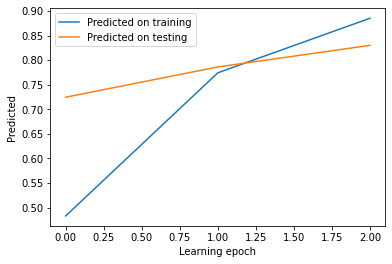

In [ ]:
plt.plot(history.history['accuracy'], 
         label='Predicted on training')
plt.plot(history.history['val_accuracy'], 
         label='Predicted on testing')
plt.xlabel('Learning epoch')
plt.ylabel('Predicted')
plt.legend()
plt.show()

In [ ]:
model.load_weights(model_save_path)

**5. Оценка LSTM моедли**

In [ ]:
y_pred_train=model.predict(x_train)
y_pred_train = y_pred_train > 0.5

print()
print(metrics.classification_report(y_train, y_pred_train, digits=3))



              precision    recall  f1-score   support

           0      0.993     0.961     0.977     48140
           1      0.851     0.942     0.894     10235
           2      0.966     0.988     0.977      5852

   micro avg      0.965     0.961     0.963     64227
   macro avg      0.937     0.964     0.949     64227
weighted avg      0.968     0.961     0.964     64227
 samples avg      0.961     0.961     0.961     64227



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred_test=model.predict(x_test)
y_pred_test = y_pred_test > 0.5
print(metrics.classification_report(y_test, y_pred_test, digits=3))

              precision    recall  f1-score   support

           0      0.943     0.874     0.907     12049
           1      0.524     0.682     0.593      2579
           2      0.810     0.703     0.753      1429

   micro avg      0.843     0.828     0.835     16057
   macro avg      0.759     0.753     0.751     16057
weighted avg      0.864     0.828     0.843     16057
 samples avg      0.828     0.828     0.828     16057



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
